https://machinelearningmastery.com/what-are-generative-adversarial-networks-gans/

In [ ]:
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot


In [ ]:
# load the images into the variable `images`
(trainX, trainy), (testX, testy) = load_data()
images = trainX

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


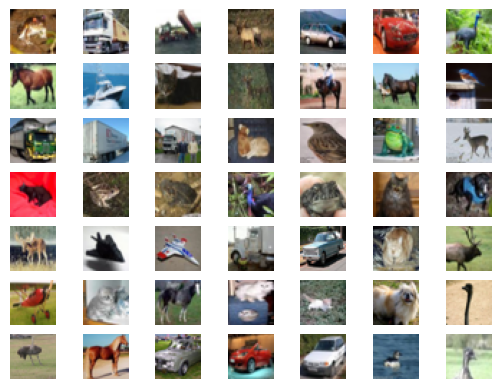

In [ ]:
for i in range(49):
    pyplot.subplot(7, 7, 1 + i)
    pyplot.axis('off')
    pyplot.imshow(images[i])
pyplot.show()

In [ ]:
print(trainX.shape)

(50000, 32, 32, 3)


In [ ]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Flatten, Reshape
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import LeakyReLU, Dropout #in gan leaky relu performs better
from keras.layers import BatchNormalization
from keras.utils import plot_model
import numpy as np

In [ ]:
def define_discriminator(in_shape=(32,32,3)):
    model = Sequential()

    model.add(Conv2D(64, (3,3), strides=(2,2), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))

    opt = Adam(learning_rate=0.00002, beta_1=0.5) # Reduced learning rate
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 16, 16, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 519,425 (1.98 MB)

 Trainable params: 519,425 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

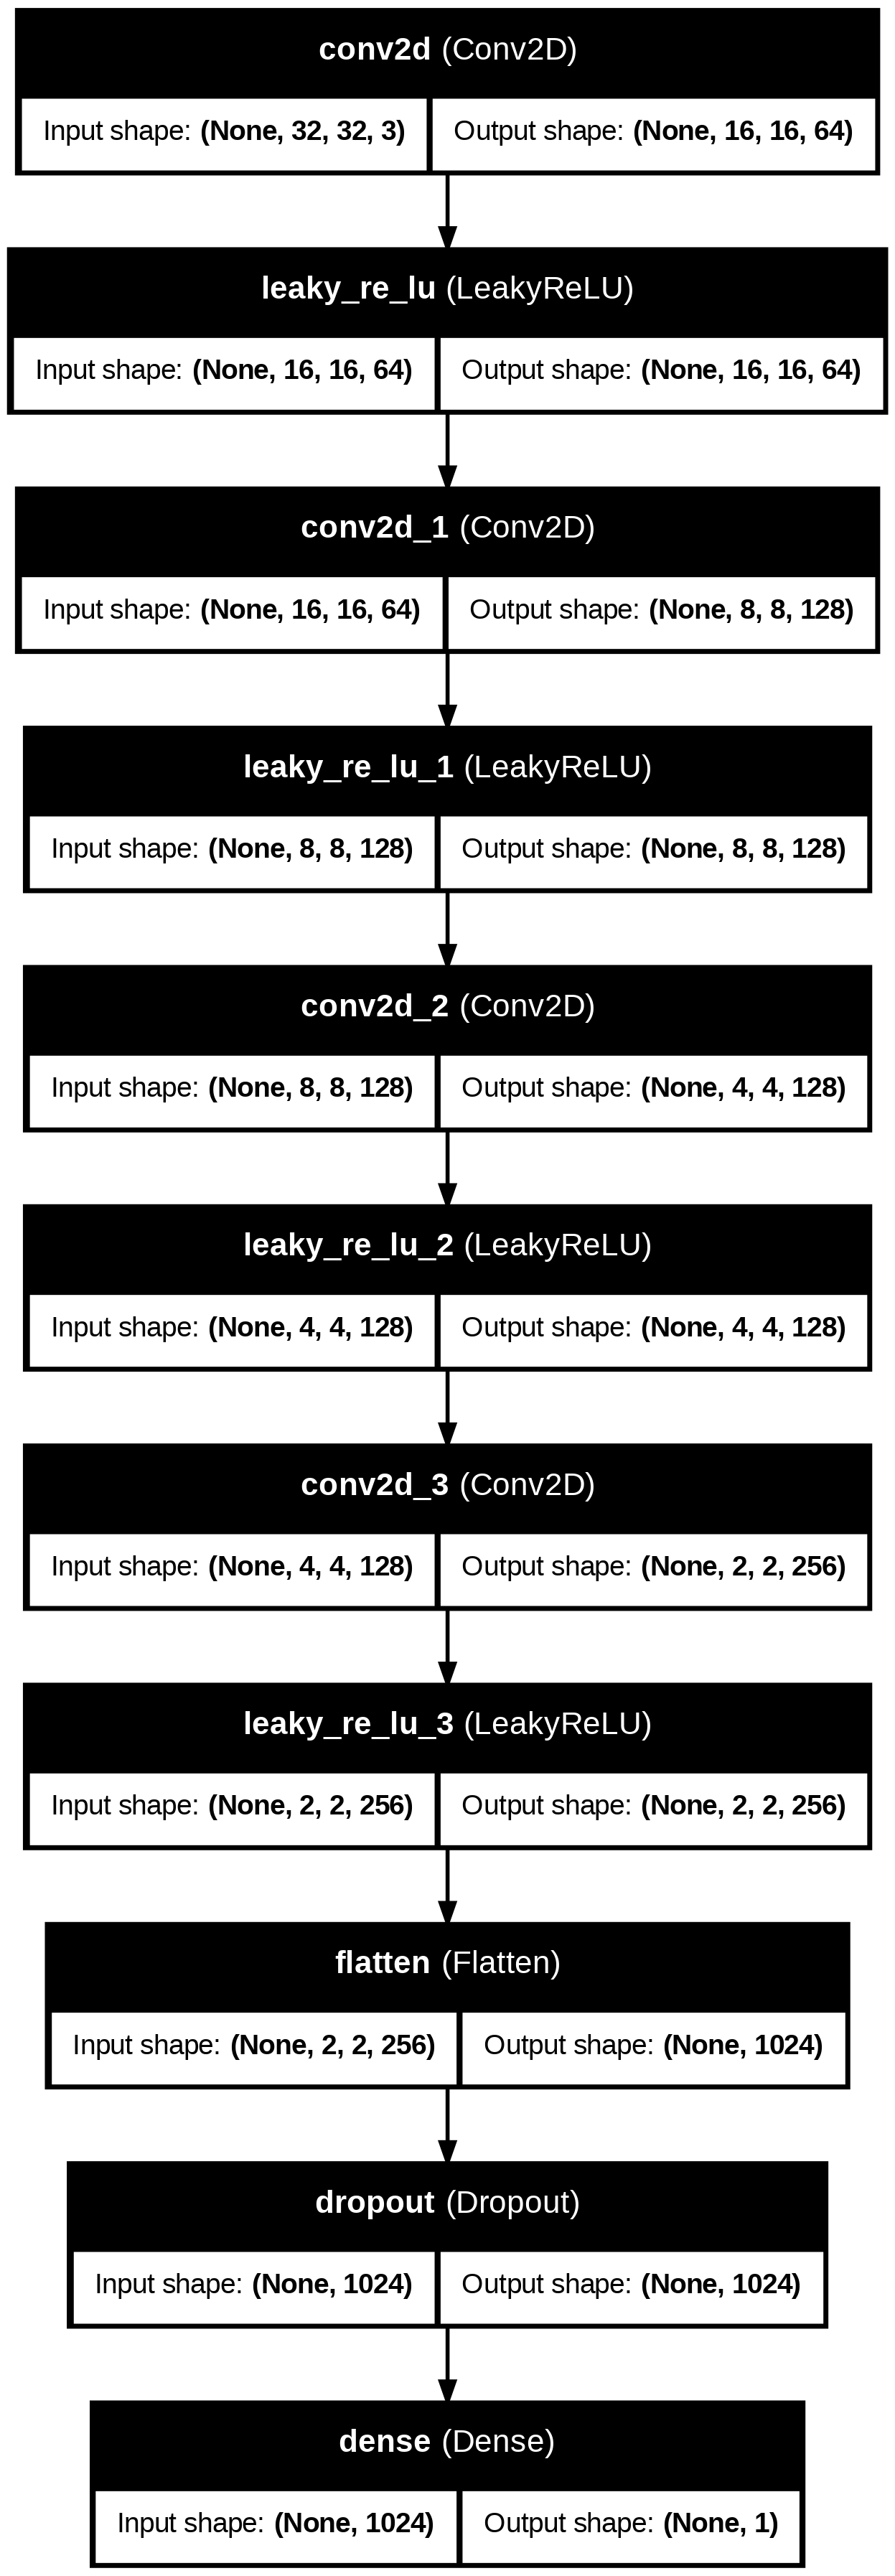

In [ ]:
model =define_discriminator()
model.summary()
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def load_real_samples():
  (trainX, _) , (testX, _) = load_data()
  X = trainX.astype('float32')
  X = (X - 127.5) / 127.5
  return X


In [ ]:
def generate_real_samples(dataset, n_samples):
    ix = np.random.randint(0, dataset.shape[0], n_samples)
    X = dataset[ix]
    y = np.ones((n_samples, 1))
    return X, y

In [ ]:
dataset = load_real_samples()
X,y = generate_real_samples(dataset, 64)

In [ ]:
def generate_fake_samples(n_samples):
  X = np.random.rand(32*32*3*n_samples)
  X = -1 + X * 2
  X = X.reshape((n_samples, 32, 32, 3))
  y = np.zeros((n_samples, 1))
  return X, y

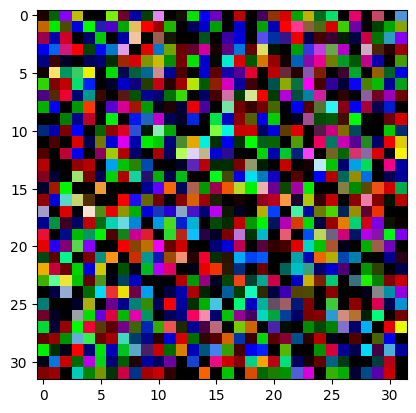

In [ ]:
X,y = generate_fake_samples(64)
pyplot.imshow(X[0])

In [ ]:
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
  half_batch = int(n_batch / 2)

  for i in range(n_iter):
    X_real, y_real = generate_real_samples(dataset, half_batch)
    _, real_acc = model.train_on_batch(X_real, y_real)
    X_fake, y_fake = generate_fake_samples(half_batch)
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_5 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 4, 4, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_6 (LeakyReLU)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_7 (LeakyReLU)       │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │         1,025 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 519,425 (1.98 MB)

 Trainable params: 519,425 (1.98 MB)

 Non-trainable params: 0 (0.00 B)

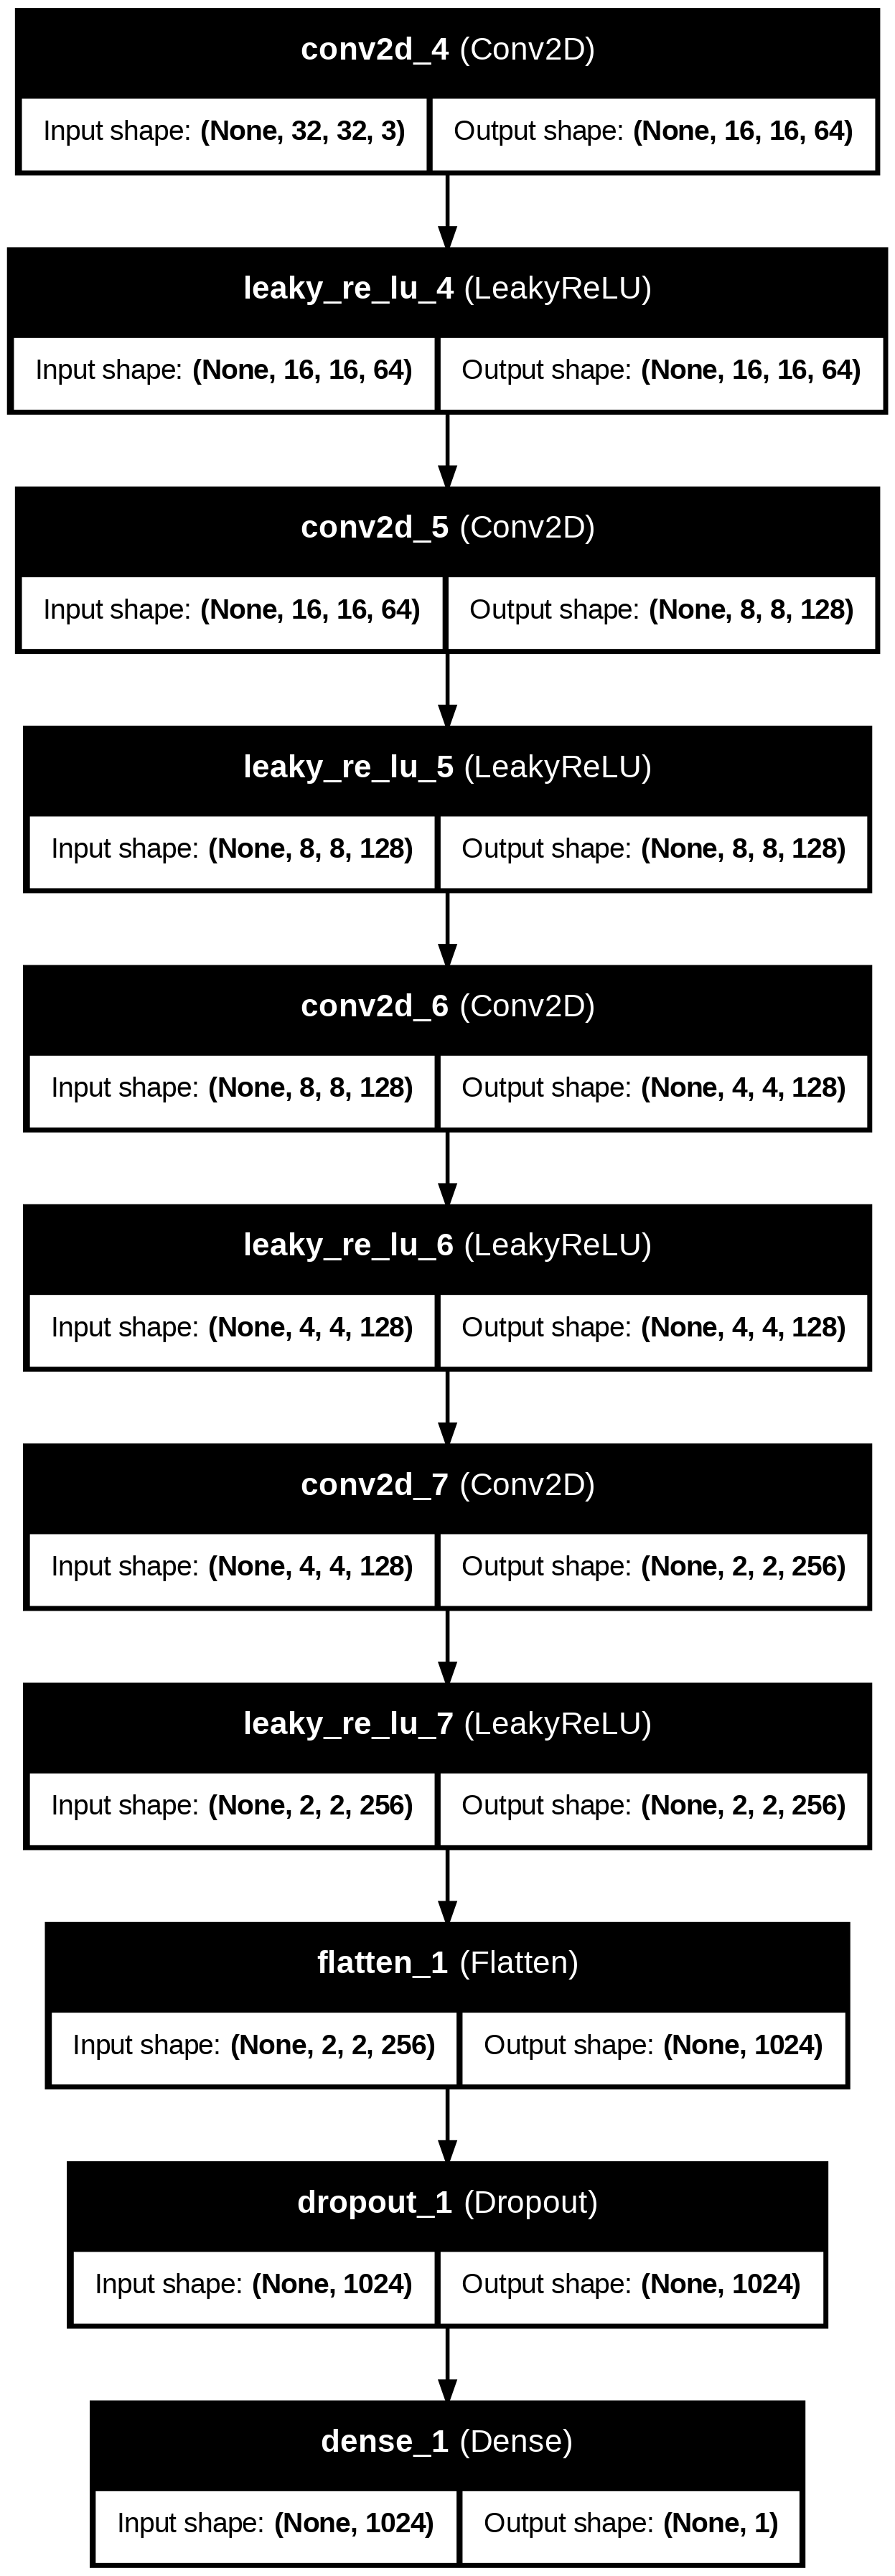

In [ ]:
model = define_discriminator()
model.summary()
plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

we use scaling [-1 to 1]
use tanh

In [ ]:
model = define_discriminator()
dataset = load_real_samples()
train_discriminator(model, dataset)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


>1 real=11% fake=45%
>2 real=34% fake=49%
>3 real=41% fake=47%
>4 real=42% fake=48%
>5 real=44% fake=49%
>6 real=45% fake=48%
>7 real=46% fake=48%
>8 real=47% fake=50%
>9 real=47% fake=50%
>10 real=48% fake=50%
>11 real=48% fake=50%
>12 real=49% fake=50%
>13 real=49% fake=51%
>14 real=49% fake=51%
>15 real=50% fake=52%
>16 real=51% fake=52%
>17 real=51% fake=52%
>18 real=51% fake=53%
>19 real=52% fake=53%
>20 real=52% fake=53%


taking 64 images in x from data set and telling thet are real by y

In [ ]:
def define_generator(latent_dim):
  model = Sequential()
  # foundation for 4x4 image
  n_nodes = 256 * 4 * 4
  model.add(Dense(n_nodes, input_dim=latent_dim))
  model.add(LeakyReLU(alpha=0.2))
  model.add(Reshape((4, 4, 256)))
  # upsample to 8x8
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 16x16
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # upsample to 32x32
  model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
  model.add(LeakyReLU(alpha=0.2))
  # output layer
  model.add(Conv2D(3, (3,3), activation='tanh', padding='same'))
  return model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4096)           │       413,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_12 (LeakyReLU)      │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 128)      │       524,416 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_13 (LeakyReLU)      │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_14 (LeakyReLU)      │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 128)    │       262,272 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_15 (LeakyReLU)      │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 3)      │         3,459 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

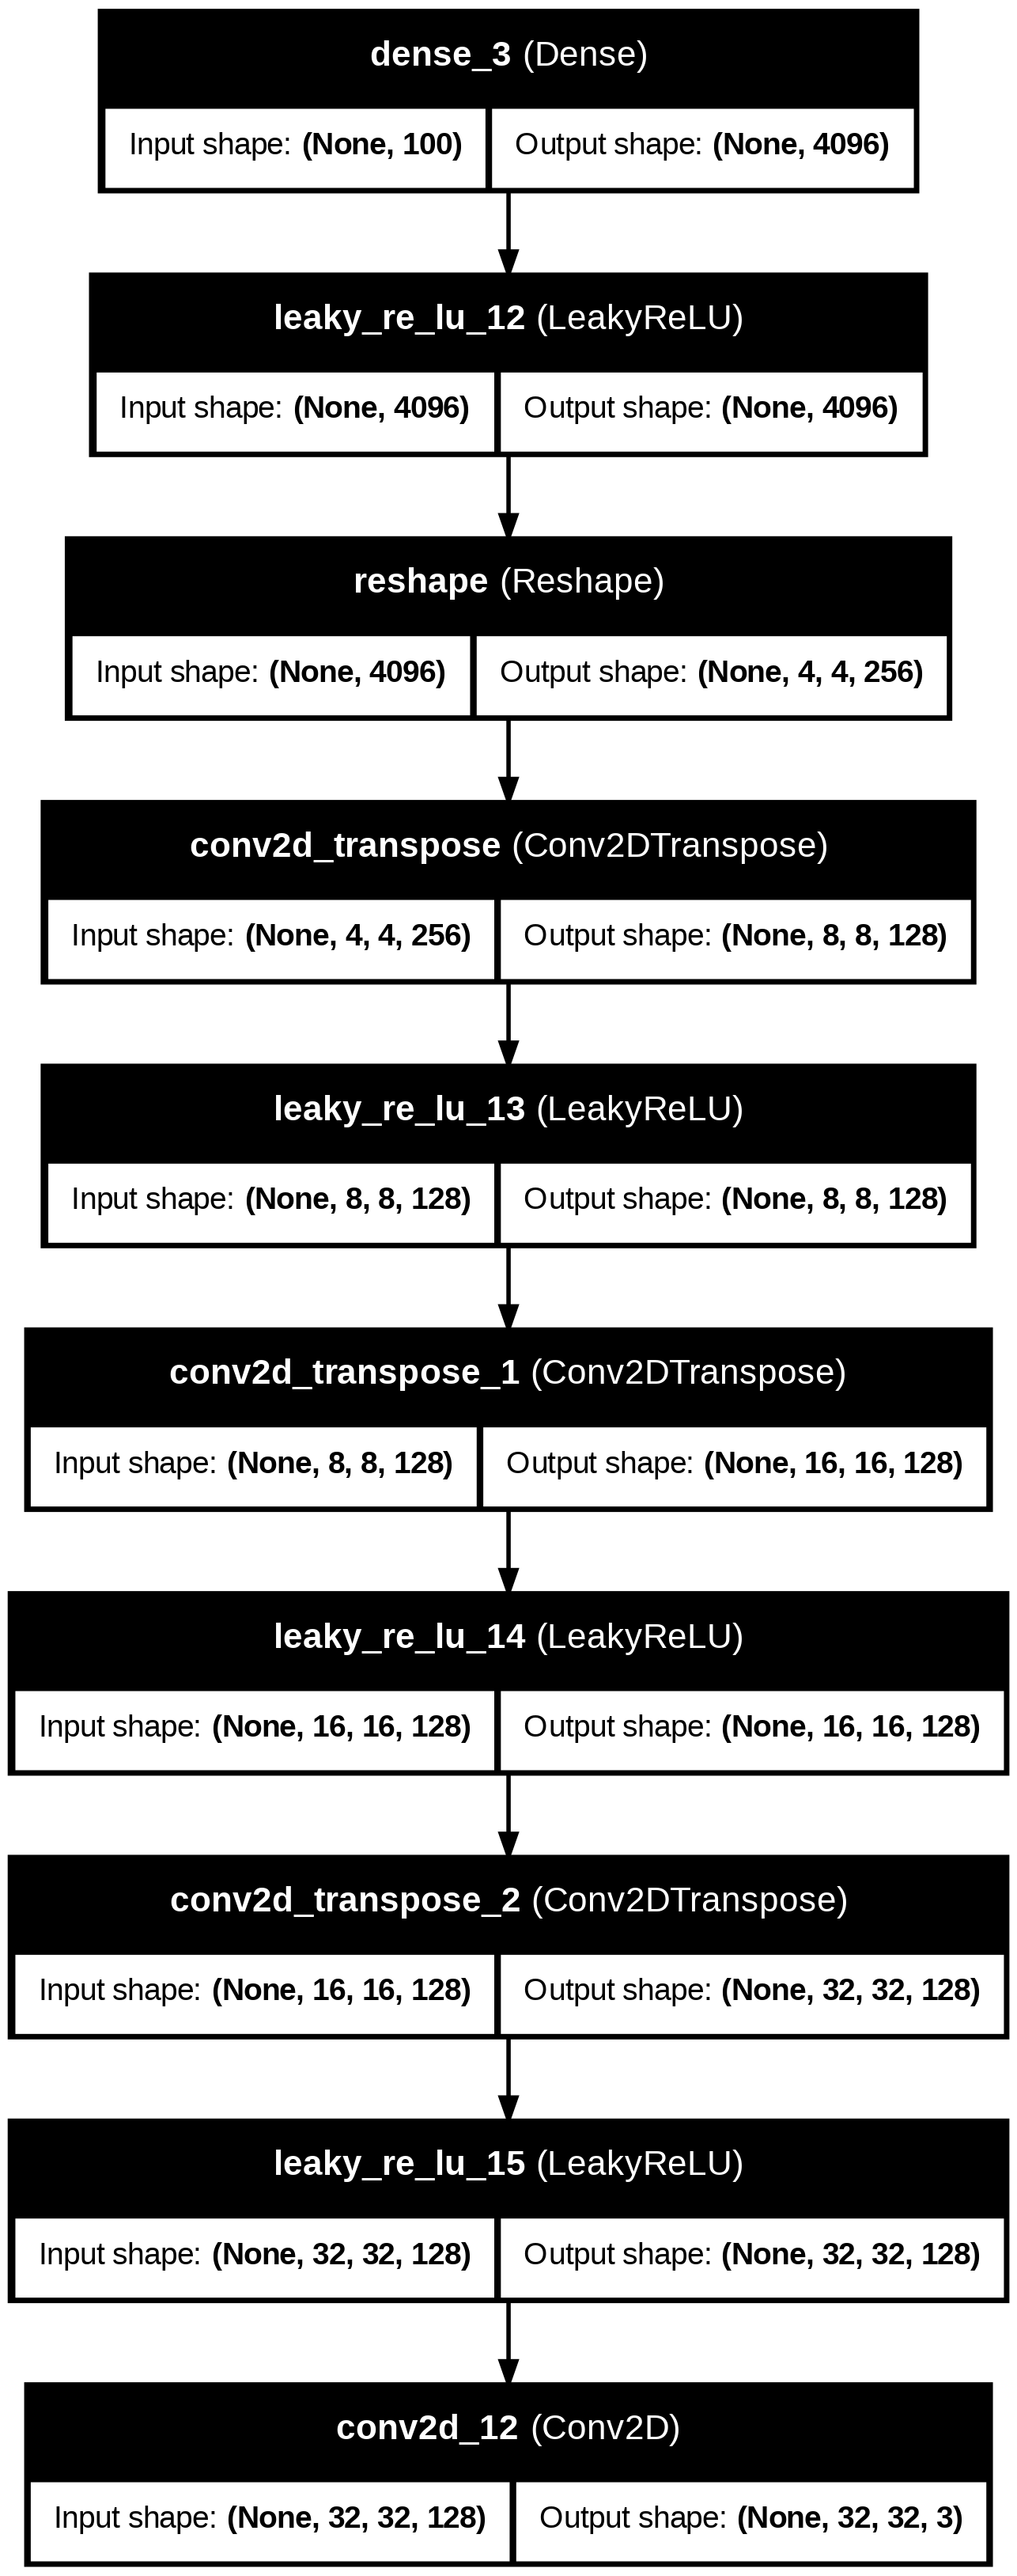

In [ ]:
latent_dim = 100
model = define_generator(latent_dim)
model.summary()
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def generate_latent_points(latent_dim, n_samples):
  x_input = np.random.randn(latent_dim * n_samples)
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

In [ ]:
x_input = generate_latent_points(100, 64)
print(x_input.shape)

(64, 100)


In [ ]:
def generate_fake_samples(g_model, latent_dim, n_samples):
  x_input = generate_latent_points(latent_dim, n_samples)
  X = g_model.predict(x_input)

  y = np.zeros((n_samples, 1))
  return X, y

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 746ms/step


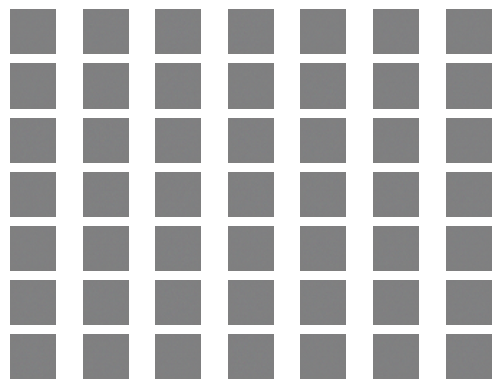

In [ ]:
latent_dim = 100
model = define_generator(latent_dim)
n_samples = 49
X, _ = generate_fake_samples(model, latent_dim, n_samples)
X = (X + 1) / 2.0
for i in range(7*7):
  pyplot.subplot(7, 7, 1 + i)
  pyplot.axis('off')
  pyplot.imshow(X[i])
pyplot.show()

In [ ]:
def define_gan(g_model, d_model):
  d_model.trainable = False
  model = Sequential()
  model.add(g_model)
  model.add(d_model)
  opt = Adam(learning_rate=0.0002, beta_1=0.5)
  model.compile(loss='binary_crossentropy', optimizer=opt)
  return model

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 32, 32, 3)      │     1,466,115 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 1)              │       519,425 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,985,540 (7.57 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 519,425 (1.98 MB)

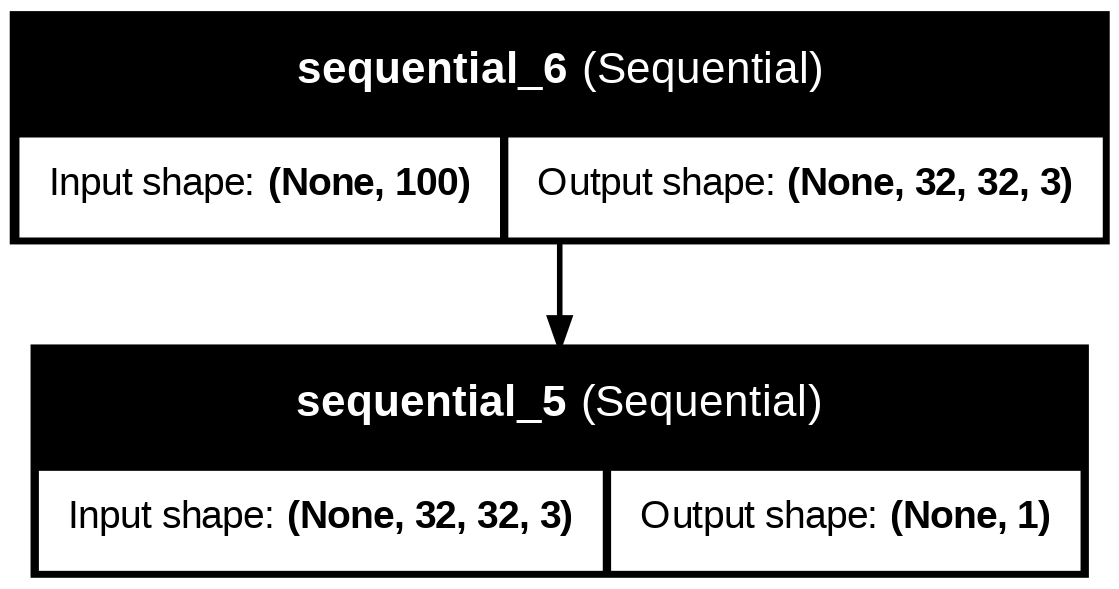

In [ ]:
latent_dim = 100
d_model = define_discriminator()
g_model = define_generator(latent_dim)
gan_model = define_gan(g_model, d_model)
gan_model.summary()
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=100, n_batch=128):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    for i in range(n_epochs):
        for j in range(bat_per_epo):
            X_real, y_real = generate_real_samples(dataset, half_batch)
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            X_gan = generate_latent_points(latent_dim, n_batch)
            y_gan = np.ones((n_batch, 1))
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' % (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
        if (i+1) % 10 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)


In [ ]:
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples=150):
  X_real, y_real = generate_real_samples(dataset, n_samples)
  _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)

  x_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
  _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose=0)

  print('>Accuracy real: %.0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))

  save_plot(x_fake, epoch)
  filename = 'generator_model_%03d.h5' % (epoch+1)
  g_model.save(filename)

In [ ]:
from matplotlib import pyplot

def save_plot(examples, epoch ,n=7):
  examples = (examples+1) / 2.0
  for i in range(n*n):
    pyplot.subplot(n, n, 1+i)
    pyplot.axis('off')
    pyplot.imshow(examples[i])
  filename = 'generated_plot_e%03d.png' % (epoch+1)
  pyplot.savefig(filename)
  pyplot.close()

In [ ]:
train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=128)


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/trainer.py:83: UserWarning: The model does not have any trainable weights.
  warnings.warn("The model does not have any trainable weights.")


Streaming output truncated to the last 5000 lines.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>4, 232/390, d1=1.031, d2=1.031 g=0.301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
>4, 233/390, d1=1.031, d2=1.031 g=0.301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>4, 234/390, d1=1.031, d2=1.031 g=0.301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>4, 235/390, d1=1.031, d2=1.031 g=0.301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>4, 236/390, d1=1.031, d2=1.031 g=0.301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
>4, 237/390, d1=1.031, d2=1.031 g=0.301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
>4, 238/390, d1=1.031, d2=1.031 g=0.301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
>4, 239/390, d1=1.031, d2=1.031 g=0.301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
>4, 240/390, d1=1.031, d2=1.031 g=0.301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>4, 241/390, d1=1.031, d2=1.031 g=0.301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
>4, 242/390, d1=1.031, d2=1.032 g=0.301
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>4, 243/390, d1=1.031, d2=1.032 g=0.301
2/2 ━━━━━━━━━

Streaming output truncated to the last 5000 lines.
>14, 151/390, d1=1.167, d2=1.167 g=0.262
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>14, 152/390, d1=1.167, d2=1.167 g=0.262
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>14, 153/390, d1=1.167, d2=1.167 g=0.262
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
>14, 154/390, d1=1.167, d2=1.167 g=0.262
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
>14, 155/390, d1=1.167, d2=1.167 g=0.262
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
>14, 156/390, d1=1.167, d2=1.167 g=0.262
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>14, 157/390, d1=1.167, d2=1.167 g=0.262
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
>14, 158/390, d1=1.167, d2=1.167 g=0.262
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
>14, 159/390, d1=1.167, d2=1.167 g=0.262
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
>14, 160/390, d1=1.167, d2=1.167 g=0.262
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
>14, 161/390, d1=1.167, d2=1.167 g=0.262
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
>14, 162/390, d1=1.167, d2=1.167 g=0.261
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
>

KeyboardInterrupt: 